In [1]:
# Import needed modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as clrs
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score, confusion_matrix
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest, chi2

from Constants import *

In [2]:
df = pd.read_csv(MAIN_FILE)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [4]:
df.rename({'default.payment.next.month' : "default"}, axis = 'columns', inplace = True)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
df.drop("ID", axis = 1, inplace = True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [6]:
df.shape

(30000, 24)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  30000 non-null  float64
 1   SEX        30000 non-null  int64  
 2   EDUCATION  30000 non-null  int64  
 3   MARRIAGE   30000 non-null  int64  
 4   AGE        30000 non-null  int64  
 5   PAY_0      30000 non-null  int64  
 6   PAY_2      30000 non-null  int64  
 7   PAY_3      30000 non-null  int64  
 8   PAY_4      30000 non-null  int64  
 9   PAY_5      30000 non-null  int64  
 10  PAY_6      30000 non-null  int64  
 11  BILL_AMT1  30000 non-null  float64
 12  BILL_AMT2  30000 non-null  float64
 13  BILL_AMT3  30000 non-null  float64
 14  BILL_AMT4  30000 non-null  float64
 15  BILL_AMT5  30000 non-null  float64
 16  BILL_AMT6  30000 non-null  float64
 17  PAY_AMT1   30000 non-null  float64
 18  PAY_AMT2   30000 non-null  float64
 19  PAY_AMT3   30000 non-null  float64
 20  PAY_AM

##### Identifying unique values
- Education has unique values 1, 2, 3 & 4, anything else must be dealt with.
- Sex has 1, 2.
- Marriage has 1, 2, 3.

In [8]:
df["EDUCATION"].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [9]:
df["MARRIAGE"].unique()

array([1, 2, 3, 0], dtype=int64)

In [10]:
df["SEX"].unique()

array([2, 1], dtype=int64)

- There are missing or unidentified values.
- Education and marriage doesn't support 0 values, hence we remove them.

In [11]:
len(df.loc[(df["EDUCATION"] == 0 ) | (df["MARRIAGE"] == 0)])

68

In [12]:
df = df.loc[(df["EDUCATION"] != 0) & (df["MARRIAGE"] != 0)]
df.shape

(29932, 24)

In [13]:
# Checking to see unknown values have been removed

print(df["EDUCATION"].unique())
print(df["MARRIAGE"].unique())

[2 1 3 5 4 6]
[1 2 3]


##### Downsampling the data
- This is done to reduce the size of the datasets.
- Defaulters and non-defaulters will be considered for downsampling.

In [14]:
# Splitting the two categories.

df_default = df[df["default"] == 1]
df_no_default = df[df["default"] == 0]

In [15]:
df_def_downsmpld = resample(df_default, replace = False, n_samples = 1000, random_state = 42)
df_def_downsmpld.head(1)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
19982,300000.0,2,1,1,47,3,2,2,2,2,...,5000.0,5000.0,5000.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [16]:
df_no_def_downsmpld = resample(df_no_default, replace = False, n_samples = 1000, random_state = 42)
df_no_def_downsmpld.head(1)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
641,130000.0,2,3,1,28,0,0,0,0,-2,...,0.0,0.0,0.0,2500.0,1000.0,0.0,0.0,0.0,0.0,0


In [17]:
# Joining the two

df = pd.concat([df_def_downsmpld, df_no_def_downsmpld])
df.tail(1)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
5859,20000.0,1,1,2,27,1,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [18]:
df = pd.concat([df_default, df_no_default])

In [19]:
df.shape

(29932, 24)

In [20]:
# Encoding categorical columns
lab_enc = LabelEncoder()

df["SEX"] = lab_enc.fit_transform(df["SEX"])
df["EDUCATION"] = lab_enc.fit_transform(df["EDUCATION"])
df["MARRIAGE"] = lab_enc.fit_transform(df["MARRIAGE"])
df["PAY_0"] = lab_enc.fit_transform(df["PAY_0"])
df["PAY_2"] = lab_enc.fit_transform(df["PAY_2"])
df["PAY_3"] = lab_enc.fit_transform(df["PAY_3"])
df["PAY_4"] = lab_enc.fit_transform(df["PAY_4"])
df["PAY_5"] = lab_enc.fit_transform(df["PAY_5"])
df["PAY_6"] = lab_enc.fit_transform(df["PAY_6"])
df.head(1)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000.0,1,1,0,24,4,4,1,1,0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1


In [21]:
# Splitting data

X = df.iloc[:, 0:23]
y = df.iloc[:, 23]

In [22]:
model = ExtraTreesClassifier()
model.fit(X, y)
key_datframe = pd.Series(model.feature_importances_, index = X.columns).nlargest(15)
#print(key_datframe)

In [23]:
# Scaling the data

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [24]:
svm_class = SVC()
svm_class.fit(X_train, y_train)
preds = svm_class.predict(X_test)

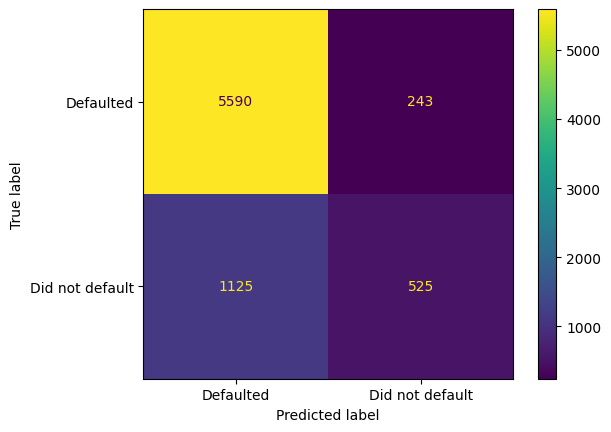

In [25]:
confusion_matrix = metrics.confusion_matrix(y_test, preds)

conf_mat = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Defaulted", "Did not default"])

conf_mat.plot()
plt.show()

In [26]:
accuracy = accuracy_score(y_test, preds)
print(accuracy)

0.8171856207403447


In [27]:
#xgb_class = XGBClassifier()
# Define the XGBClassifier xgb_class
xgb_class = XGBClassifier(max_depth = 1,
                          n_estimators = 300,
                          colsample_bytree = 0.6,
                          max_leaves = 10,
                          min_child_weight = 9,
                          gamma = 1
                          )

xgb_class.fit(X_train, y_train)
preds = xgb_class.predict(X_test)

accuracy = accuracy_score(y_test, preds)
print(accuracy)

0.8195910730990245


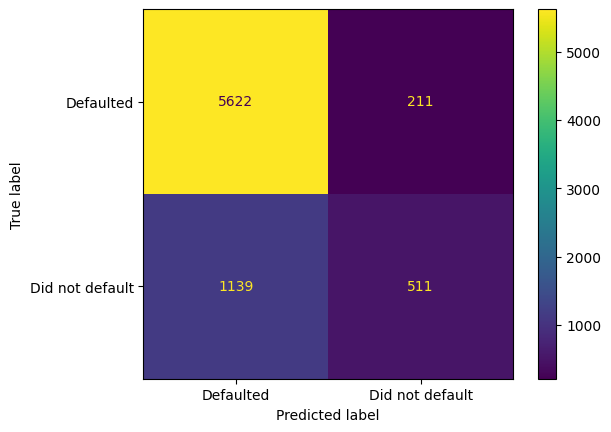

In [28]:
confusion_matrix = metrics.confusion_matrix(y_test, preds)

conf_mat = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Defaulted", "Did not default"])

conf_mat.plot()
plt.show()

In [29]:
report = classification_report(y_test, preds)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      5833
           1       0.71      0.31      0.43      1650

    accuracy                           0.82      7483
   macro avg       0.77      0.64      0.66      7483
weighted avg       0.80      0.82      0.79      7483



In [30]:
rf = RandomForestClassifier(max_depth=15, max_features=18, n_estimators = 300)
rf.fit(X_train,y_train)
preds = rf.predict(X_test)

accuracy = accuracy_score(y_test, preds)
print(accuracy)

print(rf.score(X_test, y_test))

0.8153147133502606
0.8153147133502606


In [41]:
ext = ExtraTreesClassifier(max_depth=15, max_features=18, n_estimators = 300)
ext.fit(X_train,y_train)
preds = ext.predict(X_test)

accuracy = accuracy_score(y_test, preds)
print(accuracy)

print(ext.score(X_test, y_test))

0.8181210744353868
0.8181210744353868


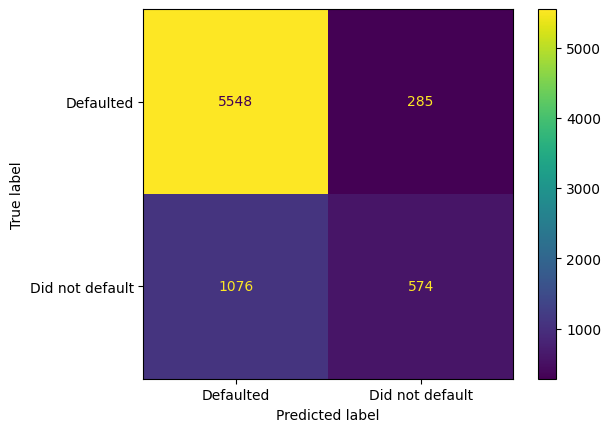

In [42]:
confusion_matrix = metrics.confusion_matrix(y_test, preds)

conf_mat = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Defaulted", "Did not default"])

conf_mat.plot()
plt.show()

In [31]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard

c:\Users\dell\miniconda3\envs\tf_cpu\Lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.12.2 when it was built against 1.12.1, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


In [32]:
# Reduce learning rate when no improvement in target metric
reducelr_on_plt = ReduceLROnPlateau(monitor = 'val_loss',
                                    factor = 0.1,
                                    patience = 5,
                                    verbose = 0,
                                    mode = 'auto', 
                                    min_delta = 0.001,
                                    min_lr = 0.001)

# Early stopping to reduce overfitting
early_stopping_monitor = EarlyStopping(monitor = 'val_loss', 
                                       verbose = 0, 
                                       patience = 20, 
                                       baseline = 0.3)

best_trained_model_file = 'best_trained_model.h5'

# Saving model after epoch
checkpoint = ModelCheckpoint(best_trained_model_file, 
                             verbose = 0,
                             monitor = 'val_loss', 
                             save_best_only = True, 
                             mode = 'auto')

callbacks = [checkpoint, reducelr_on_plt]
callbacks = [early_stopping_monitor]

In [33]:
# Defining model architecture

model = keras.Sequential([
    keras.Input(shape = (23)),
    layers.Dense(256, kernel_initializer = 'normal',  kernel_regularizer=regularizers.l2(0.001), activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.25),
    layers.Dense(512, kernel_initializer = 'normal',  kernel_regularizer=regularizers.l2(0.001), activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.25),
    layers.Dense(256, kernel_initializer = 'normal',  kernel_regularizer=regularizers.l2(0.001), activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.25),
    layers.Dense(128, kernel_initializer = 'normal',  kernel_regularizer=regularizers.l2(0.001), activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.25),
    layers.Dense(512, kernel_initializer = 'normal',  kernel_regularizer=regularizers.l2(0.001), activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.25),
    layers.Dense(256, kernel_initializer = 'normal',  kernel_regularizer=regularizers.l2(0.001), activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.25),
    layers.Dense(128, kernel_initializer = 'normal',  kernel_regularizer=regularizers.l2(0.001), activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.25),
    layers.Dense(1, kernel_initializer = 'normal',  kernel_regularizer=regularizers.l2(0.001), activation = 'sigmoid'),
])

In [34]:
# Compiling model
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy'],
)

# Parameters summary
#model.summary()

In [35]:
# Mdel fitting
history = model.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),
    validation_split = 0.25, 
    epochs = 30,
    batch_size = 64,
    #callbacks = callbacks,
    verbose = 2
)

Epoch 1/30
351/351 - 12s - loss: 1.5921 - accuracy: 0.7809 - val_loss: 1.2590 - val_accuracy: 0.8104 - 12s/epoch - 33ms/step
Epoch 2/30
351/351 - 6s - loss: 1.0162 - accuracy: 0.8125 - val_loss: 0.8240 - val_accuracy: 0.8181 - 6s/epoch - 16ms/step
Epoch 3/30
351/351 - 6s - loss: 0.7115 - accuracy: 0.8114 - val_loss: 0.6269 - val_accuracy: 0.8034 - 6s/epoch - 16ms/step
Epoch 4/30
351/351 - 6s - loss: 0.5670 - accuracy: 0.8111 - val_loss: 0.5411 - val_accuracy: 0.8086 - 6s/epoch - 16ms/step
Epoch 5/30
351/351 - 6s - loss: 0.5151 - accuracy: 0.8130 - val_loss: 0.5027 - val_accuracy: 0.8141 - 6s/epoch - 16ms/step
Epoch 6/30
351/351 - 6s - loss: 0.4933 - accuracy: 0.8106 - val_loss: 0.4988 - val_accuracy: 0.8118 - 6s/epoch - 16ms/step
Epoch 7/30
351/351 - 6s - loss: 0.4866 - accuracy: 0.8146 - val_loss: 0.5104 - val_accuracy: 0.7963 - 6s/epoch - 17ms/step
Epoch 8/30
351/351 - 6s - loss: 0.4861 - accuracy: 0.8127 - val_loss: 0.4910 - val_accuracy: 0.8141 - 6s/epoch - 16ms/step
Epoch 9/30
351

In [36]:
history = history.history
history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [37]:
acc = history['accuracy']
val_acc = history['val_accuracy']

loss = history['loss']
val_loss = history['val_loss']

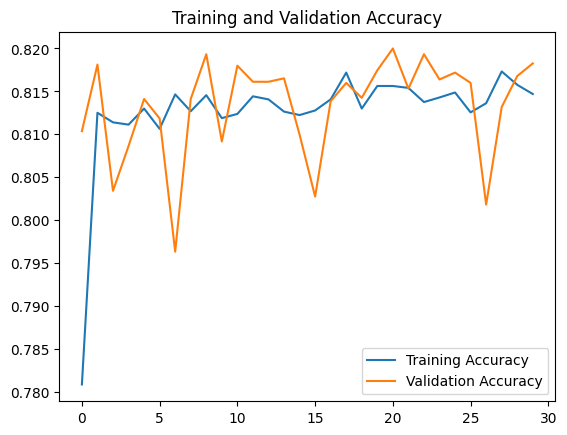

In [38]:
plt.plot(acc, label = "Training Accuracy")
plt.plot(val_acc, label = "Validation Accuracy")
plt.legend(loc = 'lower right')
plt.title("Training and Validation Accuracy")
plt.show()

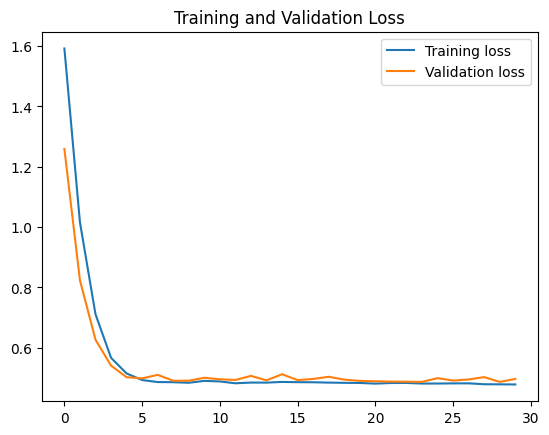

In [39]:
plt.plot(loss, label = "Training loss")
plt.plot(val_loss, label = "Validation loss")
plt.legend(loc = 'upper right')
plt.title("Training and Validation Loss")
plt.show()

In [40]:
# Visualising data using PCA

pca = PCA()
X_train = pca.fit_transform(X_train)

per_var = np.round(pca.explained_variance_ratio_ * 100, decimals = 1)
labels = [str(x) for x in range(1, len(per_var) + 1)]

plt.bar(x = range(1, len(per_var) + 1), height = per_var)
plt.tick_params(
    axis = 'x',
    which = 'both',
    bottom = False,
    top = False,
    labelbottom = False)

plt.ylabel("Explained Variance Percentage")
plt.xlabel("Principal Components")
plt.title("Scree Plot")
plt.show()

NameError: name 'PCA' is not defined